In [ ]:
#Task-13A:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from google.colab import drive 
import pandas as pd

drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/gender_dataset.csv' , sep = ";")


y = df['sex']
x = df.drop(columns=['sex', 'foot_size'])

from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)

for i in y.index:
    print(y.at[i])
    if (y.at[i] == "male"):
        y.at[i] = 1
    else:
        y.at[i] = 0

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


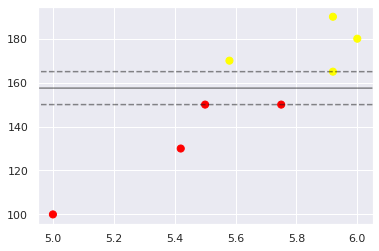

In [33]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [78]:
#Task 13-B

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [3, 5, 7, 10],
              'svc__gamma': [0.003, 0.005, 0.007, 0.01]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 5s, sys: 43 s, total: 1min 48s
Wall time: 1min 1s
{'svc__C': 3, 'svc__gamma': 0.003}


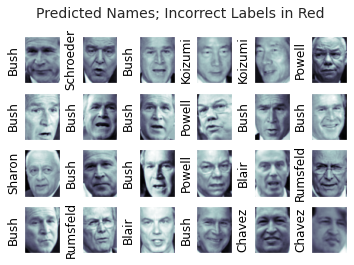

In [79]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [80]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.80      0.77        15
     Colin Powell       0.85      0.90      0.87        68
  Donald Rumsfeld       0.81      0.81      0.81        31
    George W Bush       0.93      0.92      0.92       126
Gerhard Schroeder       0.90      0.83      0.86        23
      Hugo Chavez       1.00      0.75      0.86        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.89      0.93      0.91        42

         accuracy                           0.89       337
        macro avg       0.88      0.87      0.87       337
     weighted avg       0.89      0.89      0.89       337



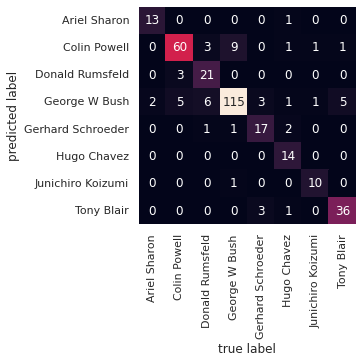

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [139]:
#Task 13-C
from sklearn.tree import DecisionTreeClassifier

drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/gender_dataset.csv' , sep = ";")

y = df['sex']
x = df.drop(columns=['sex', 'foot_size'])

tree = DecisionTreeClassifier().fit(x, y)

def visualize_classifier(model, x, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    for i in y.index:
      if (y.at[i] == "male"):
        y.at[i] = 1
      else:
        y.at[i] = 0
    
    # Plot the training points
    ax.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(x, y.astype('int'))
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'clim'


0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
Name: sex, dtype: int64


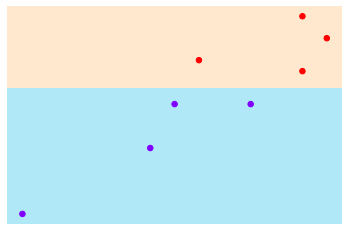

In [140]:
visualize_classifier(DecisionTreeClassifier(max_depth=2), x, y)

In [76]:
#Task 13-D
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [900, 1000, 1100],
    'max_depth': [8, 9, 10],
    'min_samples_split' : [2, 3, 4]
}

grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

model = grid.best_estimator_

ypred = model.predict(Xtest)

from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 1100}
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



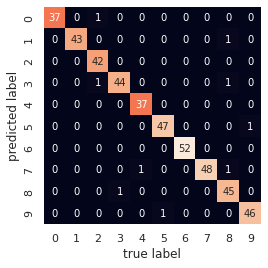

In [77]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');